In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

Question 1

In [9]:
df = pd.read_excel('advertising_sales_data.xlsx', sheet_name = 'advertising_sales_data')
avg_tv = df['TV'].mean()
print(f"The average amount spent on TV advertising: ${avg_tv:.2f}")

The average amount spent on TV advertising: $147.04


Question 2

Correlation between radio advertising and sales: 0.3497


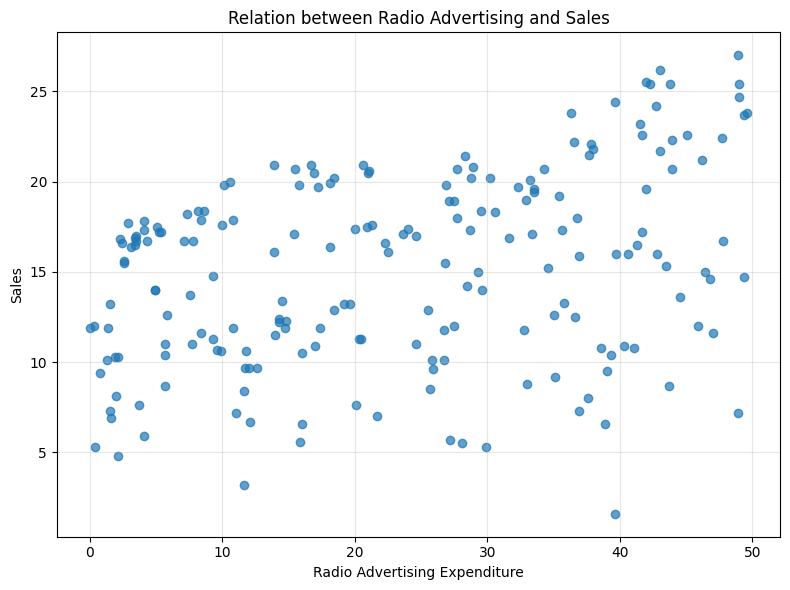

In [10]:
radio_sales_corr = df['Radio'].corr(df['Sales'])
print(f"Correlation between radio advertising and sales: {radio_sales_corr:.4f}")
plt.figure(figsize=(8,6))
plt.scatter(df['Radio'], df['Sales'], alpha=0.7)
plt.title('Relation between Radio Advertising and Sales')
plt.xlabel('Radio Advertising Expenditure')
plt.ylabel('Sales')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Question 3

Correlations with Sales:
TV: 0.9012
Radio: 0.3497
Newspaper: 0.1580

The advertising medium with the highest impact on sales is: TV


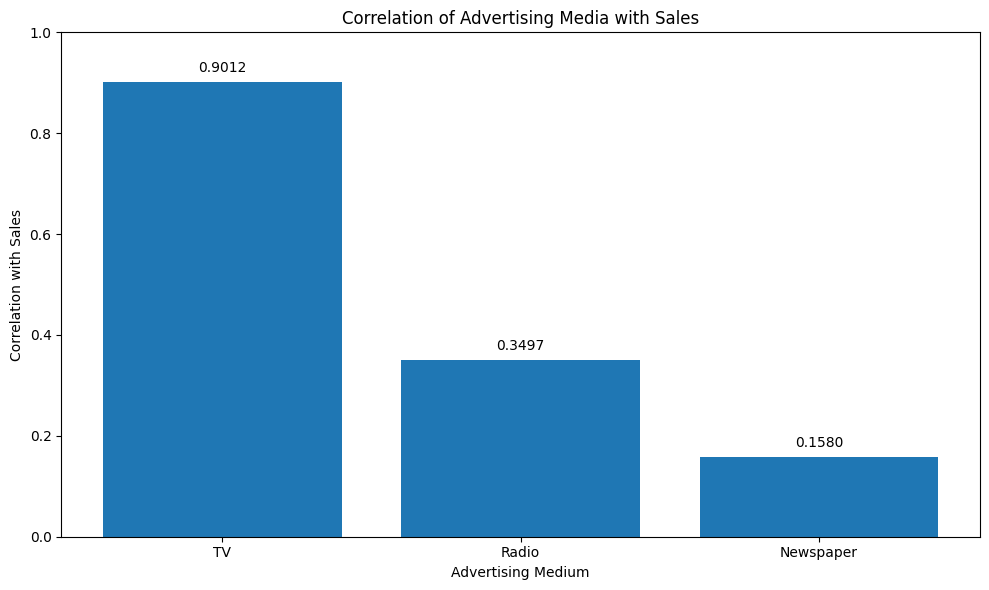

In [11]:
correlations = {}
for medium in ['TV', 'Radio', 'Newspaper']:
    valid_data = df.dropna(subset=[medium, 'Sales'])
    correlations[medium]= valid_data[medium].corr(valid_data['Sales'])
highest_impact_medium = max(correlations, key = correlations.get)
print(f"Correlations with Sales:")
for medium, corr in correlations.items():
    print(f"{medium}: {corr:.4f}")
print(f"\nThe advertising medium with the highest impact on sales is: {highest_impact_medium}")
plt.figure(figsize=(10,6))
plt.bar(correlations.keys(), correlations.values())
plt.title('Correlation of Advertising Media with Sales')
plt.xlabel('Advertising Medium')
plt.ylabel('Correlation with Sales')
plt.ylim(0,1)
for i,v in enumerate(correlations.values()):
    plt.text(i, v+ 0.02, f"{v:.4f}", ha= 'center')
plt.tight_layout()
plt.show()

Question 4

Model equation: Sales = 4.6343 + 0.0545*TV + 0.1072*Radio + -0.0000*Newspaper
Model R^2: 0.9029
Model RMSE: 1.6502


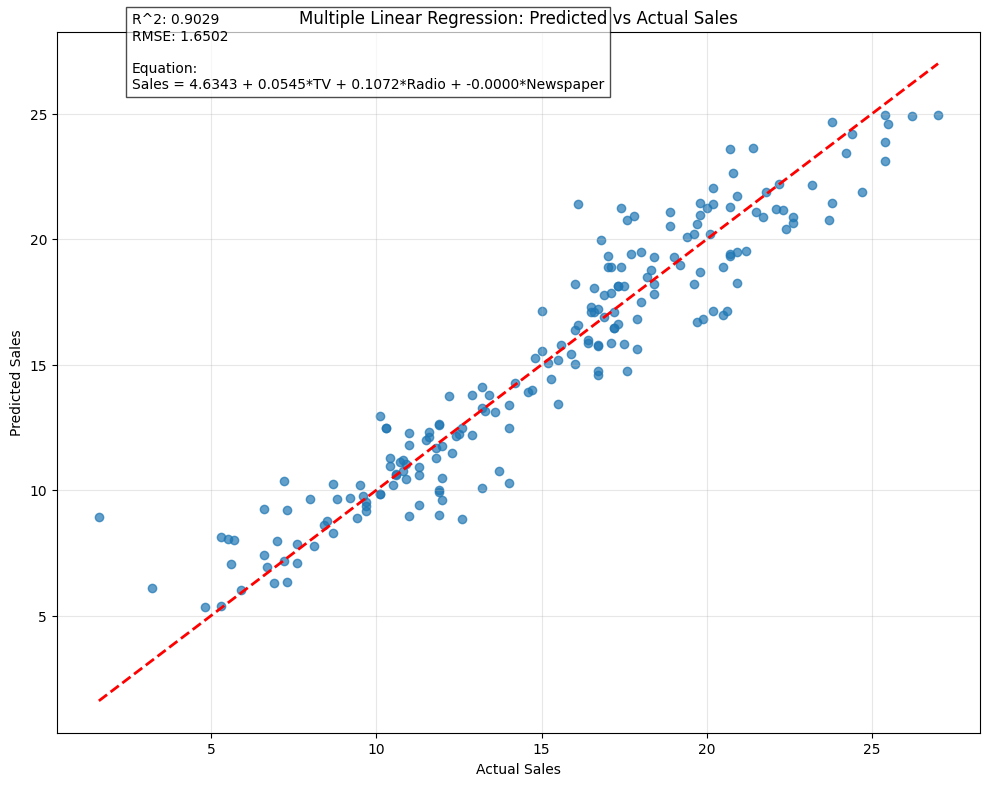

In [13]:
df_clean = df.dropna()
X = df_clean[['TV', 'Radio', 'Newspaper']]
Y = df_clean['Sales']
model = LinearRegression()
model.fit (X,Y)
Y_pred = model.predict(X)
print(f"Model equation: Sales = {model.intercept_:.4f} + {model.coef_[0]:.4f}*TV + {model.coef_[1]:.4f}*Radio + {model.coef_[2]:.4f}*Newspaper")
r2 = r2_score(Y, Y_pred)
rmse = np.sqrt(mean_squared_error(Y,Y_pred))
print(f"Model R^2: {r2:.4f}")
print(f"Model RMSE: {rmse:.4f}")
plt.figure(figsize=(10,8))
plt.scatter(Y,Y_pred, alpha=0.7)
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'r--', lw=2)
plt.title('Multiple Linear Regression: Predicted vs Actual Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.grid(True, alpha=0.3)
plt.text(Y.min() + 1, Y.max()-1,
    f"R^2: {r2:.4f}\nRMSE: {rmse:.4f}\n\nEquation:\nSales = {model.intercept_:.4f} + " +
    f"{model.coef_[0]:.4f}*TV + {model.coef_[1]:.4f}*Radio + {model.coef_[2]:.4f}*Newspaper",
    bbox=dict(facecolor= 'white', alpha=0.7))
plt.tight_layout()
plt.show()

Question 5

In [14]:
new_campaign = pd.DataFrame({
    'TV': [200],
    'Radio': [40],
    'Newspaper': [50]
})
predicted_sales= model.predict(new_campaign)[0]
print(f"Predicted sales for expenditures of $200 on TV, $40 on Radio, and $50 on Newspaper: ${predicted_sales:.2f}")
def calculate_similarity(row):
    return np.sqrt((row['TV']-200)**2 + (row['Radio']-40)**2 + (row['Newspaper']-50)**2)
df_clean['Similarity']= df_clean.fillna(0).apply(calculate_similarity, axis=1)
similar_campaigns = df_clean.sort_values('Similarity').head(5)
print(similar_campaigns[['Campaign', 'TV', 'Radio', 'Newspaper', 'Sales', 'Similarity']])

Predicted sales for expenditures of $200 on TV, $40 on Radio, and $50 on Newspaper: $19.82
   Campaign     TV  Radio  Newspaper  Sales  Similarity
14   camp15  204.1   32.9       46.0   19.0    9.122500
15   camp16  195.4   47.7       52.9   22.4    9.426558
55   camp56  198.9   49.4       60.0   23.7   13.768442
70   camp71  199.1   30.6       38.7   18.3   14.726167
58   camp59  210.8   49.6       37.7   23.8   18.976038


<ipython-input-14-60e3487fea1c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Similarity']= df_clean.fillna(0).apply(calculate_similarity, axis=1)


Question 6

In [15]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
model_normalized= LinearRegression()
model_normalized.fit(X_normalized, Y)
Y_pred_normalized = model_normalized.predict(X_normalized)
r2_normalized = r2_score(Y, Y_pred_normalized)
rmse_normalized = np.sqrt(mean_squared_error(Y, Y_pred_normalized))
print("Comparison of model performance with original vs normalised data:")
print(f"Original model - R^2: {r2:.4f}, RMSE: {rmse:.4f}")
print(f"Normalized model - R^2: {r2_normalized:.4f}, RMSE: {rmse_normalized:.4f}")
print("\nOriginal model coefficients:")
for i, feature in enumerate(['TV', 'Radio', 'Newspaper']):
    print(f"{feature}: {model.coef_[i]:.4f}")
print("\nNormalized model coefficients:")
for i, feature in enumerate(['TV', 'Radio', 'Newspaper']):
    print(f"{feature}: {model_normalized.coef_[i]:.4f}")

Comparison of model performance with original vs normalised data:
Original model - R^2: 0.9029, RMSE: 1.6502
Normalized model - R^2: 0.9029, RMSE: 1.6502

Original model coefficients:
TV: 0.0545
Radio: 0.1072
Newspaper: -0.0000

Normalized model coefficients:
TV: 4.6862
Radio: 1.5953
Newspaper: -0.0004


Question 7

In [17]:
X_reduced = df_clean[['Radio', 'Newspaper']]
reduced_model = LinearRegression()
reduced_model.fit(X_reduced, Y)
Y_pred_reduced = reduced_model.predict(X_reduced)
r2_reduced = r2_score(Y, Y_pred_reduced)
rmse_reduced = np.sqrt(mean_squared_error(Y, Y_pred_reduced))
print("Impact of excluding TV advertising from the prediction model:")
print(f"Full model  (TV, Radio, Newspaper)- R^2: {r2:.4f}, RMSE: {rmse:.4f}")
print(f"Reduced model (Radio, Newspaper only)-R^2: {r2_reduced:.4f}, RMSE: {rmse_reduced:.4f}")
print(f"Performance decrease: {r2_reduced:.4f} (R^2), {rmse_reduced-rmse:.4f} (RMSE)")
new_campaign_reduced = pd.DataFrame({
    'Radio': [40],
    'Newspaper': [50]
})
predicted_sales_reduced = reduced_model.predict(new_campaign_reduced)[0]
print (f"\nPredictions for expenditures of $200 on TV, $40 on Radio, and $50 on Newspaper:")
print(f"Full model prediction: ${predicted_sales:.2f}")
print(f"Reduced model prediction: ${predicted_sales_reduced:.2f}")
print(f"Difference: ${abs(predicted_sales- predicted_sales_reduced):.2f}")
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(Y, Y_pred, alpha=0.7)
plt.plot ([Y.min(), Y.max()], [Y.min(), Y.max()], 'r--', lw=2)
plt.title('Full Model: Predicted vs Actual')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.grid(True, alpha=0.3)
plt.text(Y.min()+1, Y.max()-1, f"R^2: {r2:.4f}", bbox=dict(facecolor='white', alpha=0.7))
plt.subplot(1,2,2)
plt.scatter(Y, Y_pred_reduced, alpha=0.7)
plt.plot ([Y.min(), Y.max()], [Y.min(), Y.max()], 'r--', lw=2)
plt.title('Reduced Model: Predicted vs Actual')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.grid(True, alpha=0.3)
plt.text(Y.min()+1, Y.max()-1, f"R^2: {r2_reduced:.4f}", bbox=dict(facecolor='white', alpha=0.7))
plt.tight_layout()
plt.savefig('full_vs_reduced_model.png')
plt.close()
print("\nAnalysis complete. All plots saved.")

Impact of excluding TV advertising from the prediction model:
Full model  (TV, Radio, Newspaper)- R^2: 0.9029, RMSE: 1.6502
Reduced model (Radio, Newspaper only)-R^2: 0.1237, RMSE: 4.9577
Performance decrease: 0.1237 (R^2), 3.3075 (RMSE)

Predictions for expenditures of $200 on TV, $40 on Radio, and $50 on Newspaper:
Full model prediction: $19.82
Reduced model prediction: $17.31
Difference: $2.51

Analysis complete. All plots saved.
